<a href="https://colab.research.google.com/github/jisu-h/DALC-Study-AI/blob/main/AI_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header=None)

# 데이터 정보
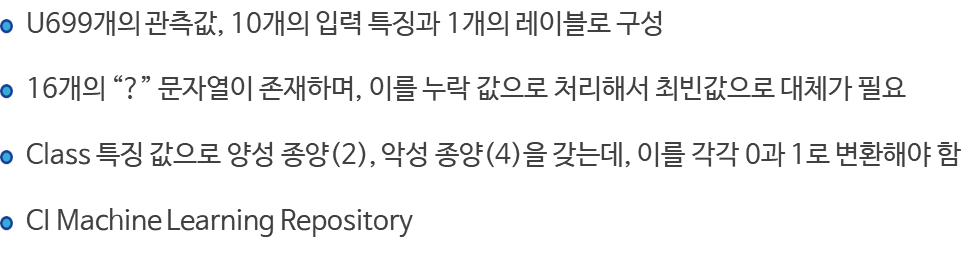

In [ ]:
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
breast_cancer.columns = ["id_number", "clump_thickness", "unif_cell_size", "unif_cell_shape", 
                         "marg_adhesion", "single_epith_cell_size","bare_nuclei", "bland_chromatin",
                         "normal_nucleoli", "mitoses", "class"]

In [ ]:
breast_cancer.head()

,id_number,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_number               699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


누락값의 대체 및 클래스 레이블을 0과 1로 변환

In [ ]:
# "?"값을 null로 대체
breast_cancer.bare_nuclei = breast_cancer.bare_nuclei.replace("?", np.NaN)

In [ ]:
breast_cancer.isnull().values.sum()

16

In [ ]:
#null값을 최빈값으로 대체
breast_cancer.bare_nuclei = breast_cancer.bare_nuclei.fillna(breast_cancer.bare_nuclei.value_counts().index[0])

In [ ]:
breast_cancer.isnull().values.sum()

0

In [ ]:
#새로운 칼럼 cancer_ind을 생성하고 악성종양(4)의 데이터를 1로 설정
breast_cancer["cancer_ind"] = 0
breast_cancer.loc[breast_cancer["class"] == 4, "cancer_ind"] = 1

In [ ]:
X = breast_cancer.drop(["id_number", "class", "cancer_ind"], axis=1)
y = breast_cancer.cancer_ind

# 훈련용,테스트용 데이터 구성

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 표준화 객체 생성

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#훈련 데이터, 테스트 데이터를 표준화
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

# KNN을 이용한 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# 분류 모델의 혼동행렬,정확도,AUC

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve 

In [ ]:
y_pred = knn.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)

0.9761904761904762

In [ ]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  3,  64]])

In [ ]:
roc_auc_score(y_test, y_pred)

0.9706189333055005

# 그리드 서치를 이용한 하이퍼파라미터의 최적 값 선택

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(knn, {"n_neighbors": [1, 2, 3, 4, 5]},n_jobs=-1, cv=7, scoring="roc_auc")

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
grid_search.best_params_

{'n_neighbors': 5}

In [ ]:
knn_best = grid_search.best_estimator_

In [ ]:
y_pred = knn_best.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [ ]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  5,  62]])

In [ ]:
roc_auc_score(y_test, y_pred)

0.9556935601711722

# Cross-Validation을 이용한 최적의 K 도출

In [ ]:
from sklearn.model_selection import cross_val_score

k_range = range(1,10)              # k를 1~10까지 고려하여 최적의 k를 찾을 것이다.
k_scores = []                      # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
	knn = KNeighborsClassifier(k)
	scores = cross_val_score(knn,X,y,cv=7,scoring = "accuracy")    # 7-fold cross-validation
	k_scores.append(scores.mean())                    # 7-fold 각각 정확도의 평균으로 성능계산 



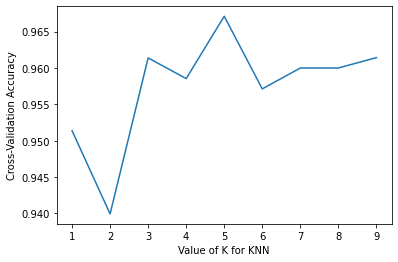

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()